# Task 2: Prediction using Unsupervised ML


In this task, the optimal number of clusters have to be found from the popular 'iris' dataset. 


Done by: Danamma S.Nuchhi

Batch:gripdec20

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Reading and Understanding the data

In [5]:
#reading the data
df=pd.read_csv("C:/Users/Lenovo/Desktop/iris.csv",sep=",", encoding="ISO-8859-1", header=0)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#reading the shape of the dataset
df.shape

(150, 6)

In [7]:

# checking the overall information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#checking the dataset from statistical point of view
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:

#Four features (sepal length, sepal width, petal length and petal width) are going to be needed for cluster analysis.
#Saving the values in variable X
X = df.iloc[:,[0,1,2,3]].values

In [28]:
#Finding the optimum number of clusters
from sklearn.cluster import KMeans
#Implementing the Elbow method
error =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    error.append(kmeans.inertia_)

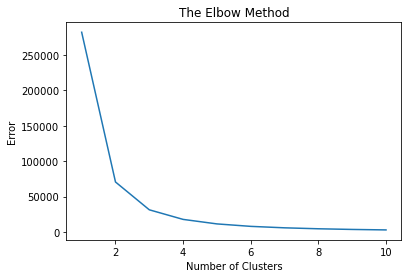

In [29]:
plt.plot(range(1,11), error)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.show()

In [30]:
#Implementing kmeans with the number of cluster being three
kmeans= KMeans(n_clusters = 3, init = 'k-means++' ,max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

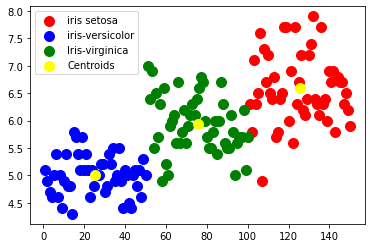

In [31]:
#Visualization of the clusters on the first two columns
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s= 100, c= 'red', label = 'iris setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1, 1], s= 100, c = 'blue', label = 'iris-versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()